Incremento sobre o que foi pedido no dia da última reunião. Os dados de cada estado foram coletados de tabelas .xlsx. Esses dados estavam em tabelas com múltiplas abas, onde apenas duas nos interessavam no momento. Sendo assim, a partir dessas duas abas, fizemos o download no formato CSV e a partir daí copiamos (na mão) apenas as linhas e colunas que nos interessavam para um novo arquivo CSV, nosso dataset "final", usado no trabalho.

In [1]:
from funcoes_auxiliares import *

pd.options.display.float_format = "{:.2f}".format
pd.options.display.max_rows = 6

In [2]:
estado = "MG"

In [3]:
nome_arquivo_alimentacao = "../dados-limpos/aquisicao_por_classe_de_rendimento_e_estado/%s/dados-limpos/%s_alimentacao.csv" % (estado, estado)

### Carregando o dataset de alimentação de acordo com o estado

In [4]:
df_alimentos = carregar_dataset_e_converter_dados(nome_arquivo_alimentacao)

In [5]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Despesa monetária e não monetária média mensal familiar (R$),Total,Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Despesas com alimentação,688.51,327.38,470.26,682.91,965.76,1183.04,1511.11,2111.32
1,Alimentação no domicílio,421.18,233.71,310.48,432.82,562.13,664.21,784.44,1013.62
2,"Cereais, leguminosas e oleaginosas",22.81,21.01,20.50,23.90,22.86,22.67,33.65,30.67
...,...,...,...,...,...,...,...,...,...
83,Outras,47.94,29.26,48.33,51.90,67.03,38.61,47.58,35.43
84,Número de famílias,7149295.00,1392069.00,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
85,Tamanho médio da família,2.93,2.36,2.69,3.13,3.48,3.11,2.93,3.02


## Parte 3

### Acima foi feito apenas uma limpeza dos dados e conversão de tipos (Etapa 2 do trabalho).

A documentação dos dados originais não é muito bem detalhada, e nem possui informações sobre as colunas do dataset, focando apenas nas suas informações gerais. Com isso, decidimos remover a coluna 'Total' porque não conseguimos encontrar um detalhamento e um significado sobre o que ela representa, e também a coluna "Despesa monetária e não monetária média mensal familiar (R$)" que não encontramos aplicação até o momento.

In [6]:
df_alimentos = df_alimentos.drop(columns=['Total'])
df_alimentos = df_alimentos.drop(columns=['Despesa monetária e não monetária média mensal familiar (R$)'])

O dataset de alimentos possui apenas uma linha com "despesas", que também não sabemos quais são os critérios para o cálculo. Por isso, optamos por remove-la também.

In [7]:
df_alimentos = df_alimentos.drop([0]).reset_index(drop=True)

In [8]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,13.31,15.60,13.85,12.66,14.22,12.00
...,...,...,...,...,...,...,...
82,Outras,48.33,51.90,67.03,38.61,47.58,35.43
83,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02


Cálculo da soma total de gastos com despesas alimentícias distribuídos por classe.

A soma é feita para se ter um parâmetro de comparação, permitindo relacionar um determinado tipo de despesa com o consumo total gasto pela classe social.

A ideia disso é poder ver o quanto essa despesa é relevante para a classe, além de nos dizer também em média quantos porcentos do salário é dedicado à ela.

In [9]:
df_alimentos = retorna_dataset_com_soma_colunas_classes_sociais(df_alimentos)

In [10]:
df_alimentos

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2),Mais de 1908 a 2862,Mais de 2862 a 5724,Mais de 5724 a 9540,Mais de 9540 a 14310,Mais de 14310 a 23850
0,Alimentação no domicílio,310.48,432.82,562.13,664.21,784.44,1013.62
1,"Cereais, leguminosas e oleaginosas",20.50,23.90,22.86,22.67,33.65,30.67
2,Arroz,13.31,15.60,13.85,12.66,14.22,12.00
...,...,...,...,...,...,...,...
83,Número de famílias,1478894.00,2470800.00,1092145.00,384637.00,207088.00,123662.00
84,Tamanho médio da família,2.69,3.13,3.48,3.11,2.93,3.02
85,Total gasto por classes,1213.81,1756.74,2422.97,2943.34,3699.75,5071.83


## Análise para despesas alimentícias

Quantidade de itens para o top N itens que mais são consumidos dentre as despesas

In [11]:
qtd_top_itens = 5

Quantidade exata de linhas para exibir no dataset

In [12]:
pd.options.display.max_rows = qtd_top_itens + 1

### Análise para a primeira classe social "Até 1908 (2)"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [13]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_alimentos, 'Até 1908 (2)', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Até 1908 (2)
0,Alimentação no domicílio,310.48
74,Alimentação fora do domicílio,159.78
75,Almoço e jantar,75.04
31,"Carnes, vísceras e pescados",56.02
82,Outras,48.33
85,Total gasto por classes,1213.81


Plot da mesma lista acima, ignorando o total de gastos por classe

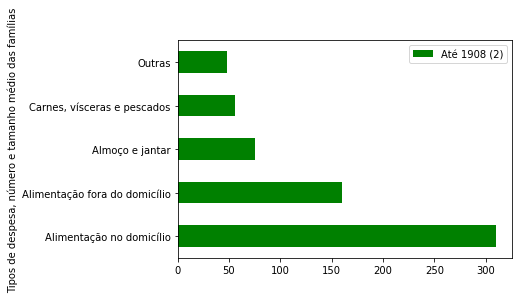

In [14]:
plot_grafico_barras_lista_top_N_itens(df_alimentos, 'Até 1908 (2)', qtd_top_itens, 'green')

### Análise para a segunda classe social "Mais de 1908 a 2862"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [15]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_alimentos, 'Mais de 1908 a 2862', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 1908 a 2862
0,Alimentação no domicílio,432.82
74,Alimentação fora do domicílio,250.09
75,Almoço e jantar,134.49
31,"Carnes, vísceras e pescados",81.59
50,Panificados,59.49
85,Total gasto por classes,1756.74


Plot da mesma lista acima, ignorando o total de gastos por classe

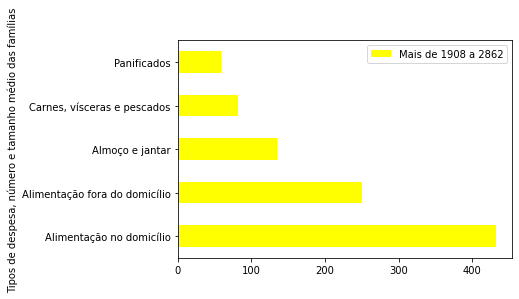

In [16]:
plot_grafico_barras_lista_top_N_itens(df_alimentos, 'Mais de 1908 a 2862', qtd_top_itens, 'yellow')

### Análise para a terceira classe social "Mais de 2862 a 5724"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [17]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_alimentos, 'Mais de 2862 a 5724', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 2862 a 5724
0,Alimentação no domicílio,562.13
74,Alimentação fora do domicílio,403.63
75,Almoço e jantar,238.83
31,"Carnes, vísceras e pescados",115.87
50,Panificados,73.08
85,Total gasto por classes,2422.97


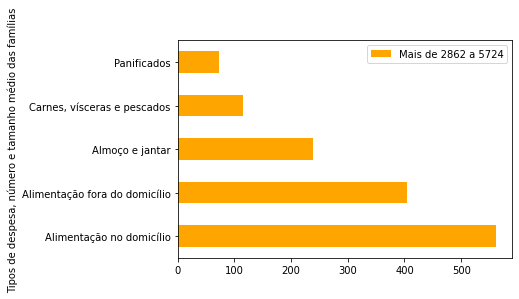

In [18]:
plot_grafico_barras_lista_top_N_itens(df_alimentos, 'Mais de 2862 a 5724', qtd_top_itens, 'orange')

### Análise para a quarta classe social "Mais de 5724 a 9540"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [19]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_alimentos, 'Mais de 5724 a 9540', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 5724 a 9540
0,Alimentação no domicílio,664.21
74,Alimentação fora do domicílio,518.82
75,Almoço e jantar,361.74
31,"Carnes, vísceras e pescados",121.03
59,Bebidas e infusões,86.69
85,Total gasto por classes,2943.34


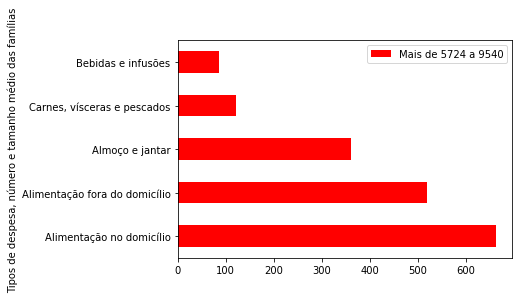

In [20]:
plot_grafico_barras_lista_top_N_itens(df_alimentos, 'Mais de 5724 a 9540', qtd_top_itens, 'red')

### Análise para a quinta classe social "Mais de 9540 a 14310"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [21]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_alimentos, 'Mais de 9540 a 14310', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 9540 a 14310
0,Alimentação no domicílio,784.44
74,Alimentação fora do domicílio,726.67
75,Almoço e jantar,554.93
31,"Carnes, vísceras e pescados",119.50
43,Leites e derivados,106.06
85,Total gasto por classes,3699.75


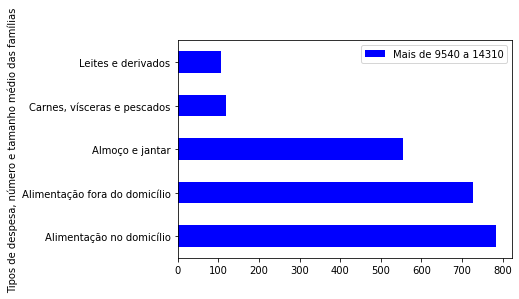

In [22]:
plot_grafico_barras_lista_top_N_itens(df_alimentos, 'Mais de 9540 a 14310', qtd_top_itens, 'blue')

### Análise para a sexta classe social "Mais de 14310 a 23850"

Lista dos N itens que mais foram consumidos dentre as despesas gerais

In [23]:
retorna_lista_top_N_itens_mais_vendidos_classe_social(df_alimentos, 'Mais de 14310 a 23850', qtd_top_itens)

,"Tipos de despesa, número e tamanho médio das famílias",Mais de 14310 a 23850
74,Alimentação fora do domicílio,1097.70
0,Alimentação no domicílio,1013.62
75,Almoço e jantar,885.32
31,"Carnes, vísceras e pescados",182.46
59,Bebidas e infusões,123.02
85,Total gasto por classes,5071.83


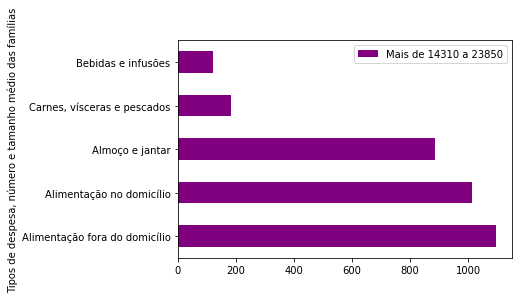

In [24]:
plot_grafico_barras_lista_top_N_itens(df_alimentos, 'Mais de 14310 a 23850', qtd_top_itens, 'purple')

In [25]:
cores = ['green', 'yellow', 'orange', 'red', 'blue', 'purple']

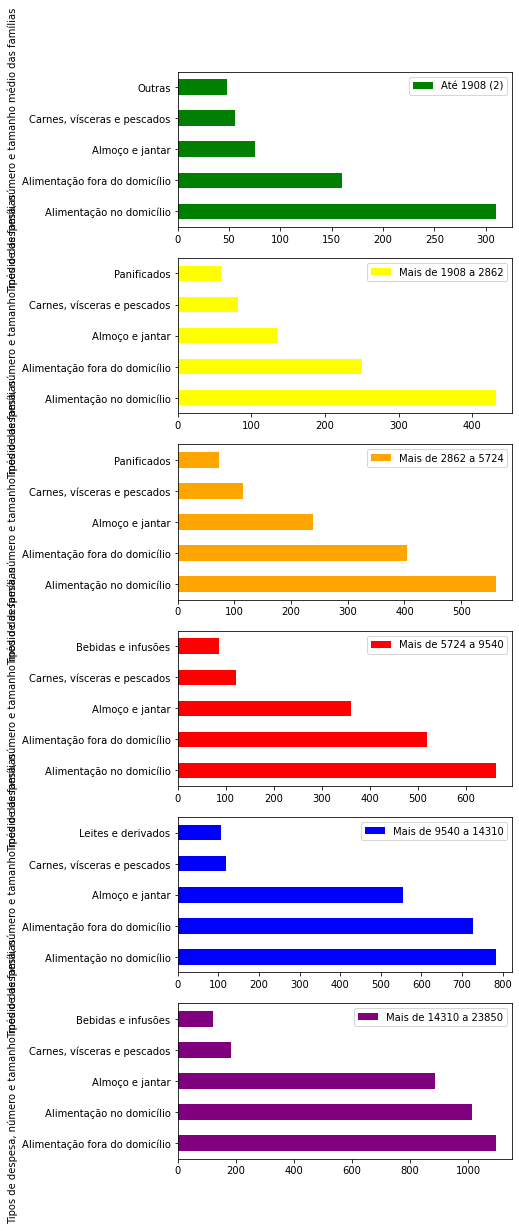

In [26]:
plot_todos_graficos_barras_lista_top_N_itens(df_alimentos, qtd_top_itens, cores)